In [1]:
import numpy as np


point = np.array([1,1,1])

dip = np.radians(0)
strike = np.radians(0)

cosDip, cosStrike, sinDip, sinStrike = np.cos(dip), np.cos(strike), np.sin(dip), np.sin(strike), 

rotationStrike = np.array([[cosStrike, -sinStrike, 0],
                           [sinStrike, cosStrike, 0],
                           [0,0,1]]
                         )

rotationDip = np.array([[cosDip, 0, -sinDip],
                           [0, 1, 0],
                           [sinDip,0,cosDip]]
                         
                      )

rotationMatrix = np.array([
    [cosStrike*cosDip,-sinStrike,-cosStrike*sinDip],
    [sinStrike*cosDip,cosStrike,-sinDip*sinStrike],
    [sinDip,0,cosDip]
])

In [2]:
np.tile(point.dot(rotationMatrix),(4,1)).T

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [3]:
point= np.array([35,25,0])
a = np.tile(point, (2,1))
b = np.repeat(point[np.newaxis,:], 2, 0)

a.dot(rotationMatrix)

b.dot(rotationMatrix)

diff = point -a.dot(rotationMatrix)

np.sqrt((((np.abs(diff) + diff)/2)**2).sum(axis=1))

array([0., 0.])

In [4]:
points = [(x, y,z) for x in np.arange(-50,50, 0.1) for y in np.arange(-50,50, 0.1) for z in range(1)]

In [5]:
diff = np.abs(np.array(points).dot(rotationMatrix)) - point

distances = np.sqrt((((np.abs(diff) + diff)/2)**2).sum(axis=1))

Text(0.5,1,'Simplest default with labels')

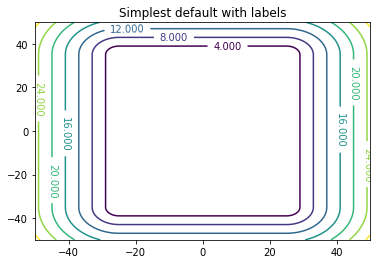

In [7]:
import matplotlib.pylab as plt
plt.figure()
CS = plt.contour(np.arange(-50,50, 0.1), 
                 np.arange(-50,50, 0.1),
                 distances.reshape(1000,1000))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')

In [31]:
np.mean(np.array([[np.sqrt(((points-point*np.array([1,1,1]))**2).sum(axis=1))],
          [np.sqrt(((points-point*np.array([-1,1,1]))**2).sum(axis=1))],
          [np.sqrt(((points-point*np.array([-1,-1,1]))**2).sum(axis=1))],
         [np.sqrt(((points-point*np.array([1,-1,1]))**2).sum(axis=1))]]), axis=0)

array([[70.7248199 , 70.65415876, 70.58356856, ..., 70.44217594,
        70.51276587, 70.58342688]])

In [2]:
from scipy.spatial.distance import cdist
def EQDistances(points,EQDEPTH,Strike,Dip,Length,Width,DeltaL,DeltaW):
#TODO: DeltaL, DeltaW

    dip = np.radians(-Dip)
    strike = np.radians(Strike-90)

    cosDip, cosStrike, sinDip, sinStrike = np.cos(dip), np.cos(strike), np.sin(dip), np.sin(strike)

    rotationStrike = np.array([[cosStrike, -sinStrike, 0],
                               [sinStrike, cosStrike, 0],
                               [0,0,1]]
                             )


    rotationDip = np.array([[cosDip, 0, -sinDip],
                           [0, 1, 0],
                           [sinDip,0,cosDip]]
                          )

    #DISTANCE CALCULATIONS
    repi = np.sqrt(np.sum(points**2, axis = 1))
    rhyp = np.sqrt(repi**2+EQDEPTH**2)

    eqDimensions = np.array([Width/2,Length/2,0])
    eqDimensionsSurface = eqDimensions * np.array([np.cos(Dip),1,1])

    ### RJB
    #rotate eventcoords back strikewise
    #so that cases become easy to check
    points = np.array(points).dot(rotationStrike)
    diff = np.abs(points) - eqDimensionsSurface

    rjb = np.sqrt((((np.abs(diff) + diff)/2)**2).sum(axis=1))
    ### RRUP
    #rotate eventcoords back dipwise
    #so that cases become easy to check
    points = (np.array(points)+np.array([0,0,EQDEPTH])).dot(rotationDip)
    diff = np.abs(points) - eqDimensions

    rrup = np.sqrt((((np.abs(diff) + diff)/2)**2).sum(axis=1))
    
    rell = cdist(points, np.array([eqDimensions*np.array([-1,1,1]),
                                eqDimensions*np.array([-1,-1,1])])).mean(axis=1)

    rz = cdist(points, np.array([eqDimensions*np.array([1,1,1]),
                                eqDimensions*np.array([-1,1,1]),
                                eqDimensions*np.array([-1,-1,1]),
                                eqDimensions*np.array([1,-1,1])])).mean(axis=1)

    return (repi,rhyp,rjb,rrup,rell,rz)

dist= EQDistances(np.array([[1,1,0],[1,1,0],[1,1,0]]),50,30,35,35,34,0,0)

In [3]:
dist[4]

array([45.76536183, 45.76536183, 45.76536183])

In [16]:
diste

(array([70.71067812, 70.64000283, 70.56939847, ..., 70.4279774 ,
        70.49858155, 70.56925676]),
 array([86.60254038, 86.54484387, 86.48722449, ..., 86.37187042,
        86.429451  , 86.48710887]),
 array([61.36031092, 61.27101147, 61.18174513, ..., 61.04740609,
        61.13670501, 61.22603702]),
 array([40.44609554, 40.41165144, 40.37742561, ..., 97.1150793 ,
        97.15873334, 97.20247066]),
 array([[ 62.40894351,  62.35314567,  62.29746323, ..., 108.89504849,
         108.95342794, 109.0118674 ]]))

In [39]:
import matplotlib.pylab as plt

X = np.arange(-50,50, 0.1)
Y = np.arange(-50,50, 0.1)
EQDEPTH = 10
Strike = 10
Dip=45
Length = 50
Width= 20
DeltaL = 0
DeltaW = 0

dip = np.radians(-Dip)
strike = np.radians(Strike-90)

cosDip, cosStrike, sinDip, sinStrike = np.cos(dip), np.cos(strike), np.sin(dip), np.sin(strike)

rotationStrike = np.array([[cosStrike, -sinStrike, 0],
                           [sinStrike, cosStrike, 0],
                           [0,0,1]]
                         )

fault = np.array([[0,-Length/2,0], [0, Length/2,0]]).dot(rotationStrike)

points = [(x, y,z) for x in X for y in Y for z in range(1)]
diste = EQDistances(np.array(points),EQDEPTH,Strike,Dip,Length,Width,DeltaL,DeltaW)
fault[:,0]

array([ 24.62019383, -24.62019383])

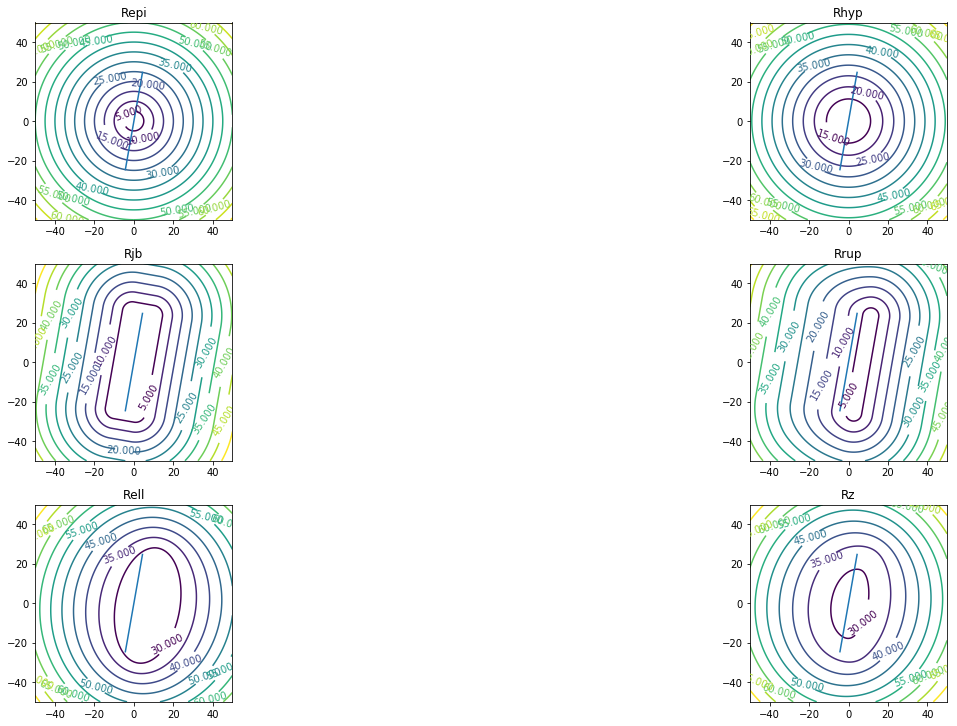

In [43]:
%matplotlib inline
fig = plt.figure(figsize=(20,20))


levels = range(0, 100,5)

plt.subplot(6, 2, 1)

CS1 = plt.contour(X, 
                 Y,
                 diste[0].reshape(len(X),len(Y)),
                 levels)
plt.plot(fault[:,1],-fault[:,0])
plt.axis('square')

plt.clabel(CS1, inline=1, fontsize=10)
plt.title('Repi')


plt.subplot(6, 2, 2)

CS2 = plt.contour(X, 
                 Y,
                 diste[1].reshape(len(X),len(Y)),
                 levels)
plt.plot(fault[:,1],-fault[:,0])
plt.axis('square')

plt.clabel(CS2, inline=1, fontsize=10)
plt.title('Rhyp')

plt.subplot(6, 2, 3)

CS3 = plt.contour(X, 
                 Y,
                 diste[2].reshape(len(X),len(Y)),
                 levels)
plt.plot(fault[:,1],-fault[:,0])
plt.axis('square')

plt.clabel(CS3, inline=1, fontsize=10)
plt.title('Rjb')


plt.subplot(6, 2, 4)

CS4 = plt.contour(X, 
                 Y,
                 diste[3].reshape(len(X),len(Y)),
                 levels)
plt.plot(fault[:,1],-fault[:,0])
plt.axis('square')
plt.clabel(CS4, inline=1, fontsize=10)
plt.title('Rrup')

plt.subplot(6, 2, 5)

CS5 = plt.contour(X, 
                 Y,
                 diste[4].reshape(len(X),len(Y)),
                 levels)
plt.plot(fault[:,1],-fault[:,0])
plt.axis('square')

plt.clabel(CS5, inline=1, fontsize=10)
plt.title('Rell')


plt.subplot(6, 2, 6)

CS6 = plt.contour(X, 
                 Y,
                 diste[5].reshape(len(X),len(Y)),
                 levels)
plt.plot(fault[:,1],-fault[:,0])
plt.axis('square')
plt.clabel(CS6, inline=1, fontsize=10)
plt.title('Rz')

plt.tight_layout()
#fig.subplots_adjust(wspace=0, hspace=0)
plt.show()